<a href="https://colab.research.google.com/github/AkshayaPadigela/Bike_Sharing_demand_prediction/blob/main/Bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [ ]:
data = pd.read_csv('/content/bikes.csv.zip',sep=',')

In [ ]:
display(data)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
seasonMap={1:'spring',2:'summer',3:'fall',4:'winter'}
weatherMap={1:'clear + few clouds + Partly cloudy + Partly cloudy',\
            2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
            3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',\
            4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

In [ ]:
data["date"] =data.dteday.apply(lambda x:x.split()[0])
data["weekday"] = data.date.apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data["weather"] = data.weathersit.map(weatherMap)

In [ ]:
categoryVariableList = ['hr','weekday','mnth','season','weather','holiday','workingday']
for var in categoryVariableList:
    data[var] = data[var].astype('category')
    # Check if 'dteday' column exists before dropping
if 'dteday' in data.columns:
    data = data.drop(['dteday'],axis=1)
else:
    print("Column 'dteday' not found in DataFrame. Skipping drop operation.")



In [ ]:
display(data)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather
0,1,spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01,clear + few clouds + Partly cloudy + Partly cl...
1,2,spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01,clear + few clouds + Partly cloudy + Partly cl...
2,3,spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01,clear + few clouds + Partly cloudy + Partly cl...
3,4,spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01,clear + few clouds + Partly cloudy + Partly cl...
4,5,spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01,clear + few clouds + Partly cloudy + Partly cl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,spring,1,12,19,0,Monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,17376,spring,1,12,20,0,Monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,17377,spring,1,12,21,0,Monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31,clear + few clouds + Partly cloudy + Partly cl...
17377,17378,spring,1,12,22,0,Monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31,clear + few clouds + Partly cloudy + Partly cl...


<Axes: >

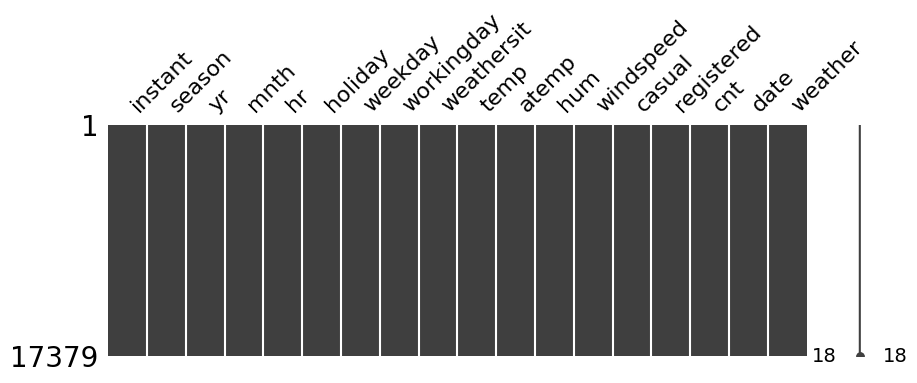

In [ ]:
msno.matrix(data,figsize=(10,3))

<Axes: xlabel='workingday', ylabel='cnt'>

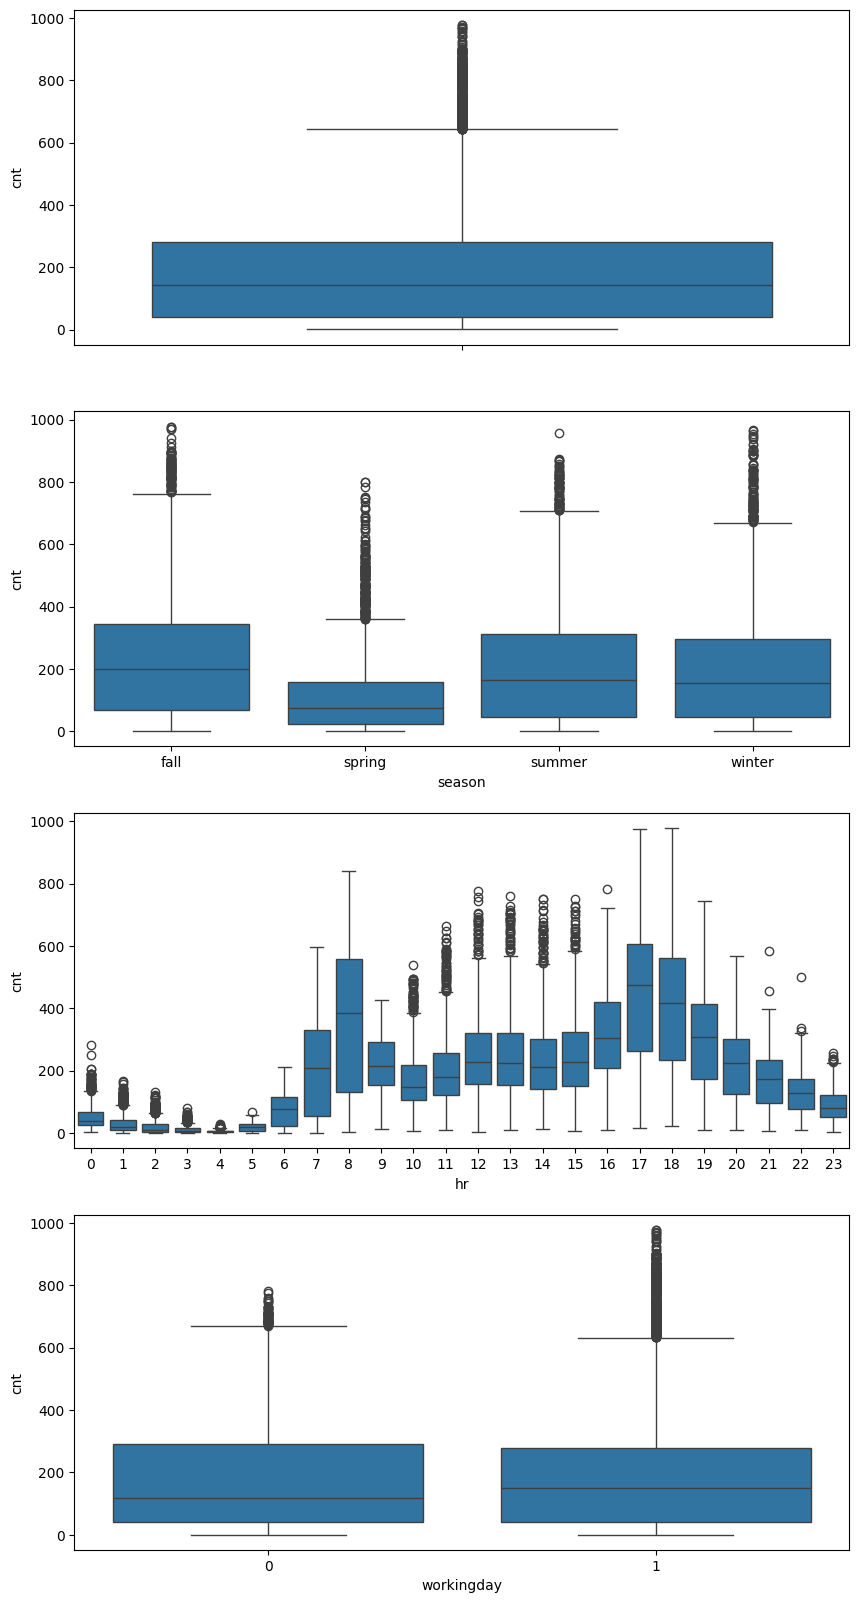

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,y='cnt',orient='v',ax=axes[0])
sns.boxplot(data=data,y='cnt',x='season',orient='v',ax=axes[1])
sns.boxplot(data=data,y='cnt',x='hr',orient='v',ax=axes[2])
sns.boxplot(data=data,y='cnt',x='workingday',orient='v',ax=axes[3])

In [ ]:
axes[0].set(ylabel='Count',title='Count Distribution')
axes[1].set(xlabel='Season',ylabel='Count',title='Count/Season Distribution')
axes[2].set(xlabel='Hour Of The Day',ylabel='Count',title='Count/Hour Distribution')
axes[3].set(xlabel='Working Day',ylabel='Count',title='Box Plot on Count/Working Day Distribution')

[Text(0.5, 23.999999999999993, 'Working Day'),
 Text(24.0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot on Count/Working Day Distribution')]

<Axes: >

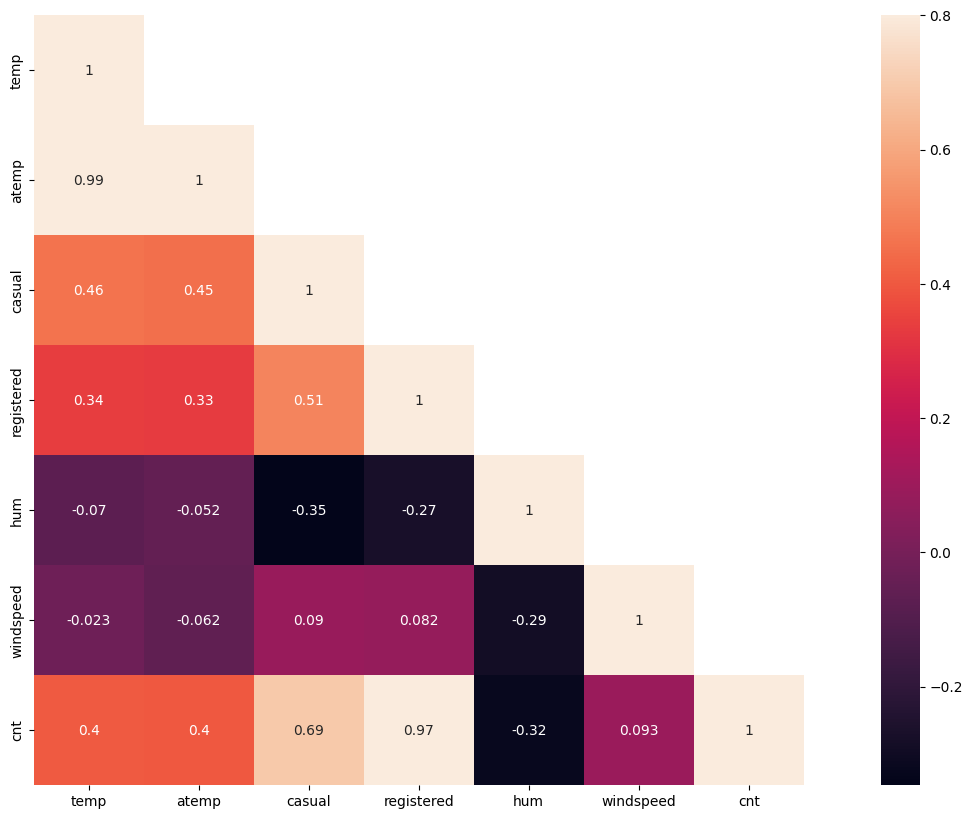

In [ ]:
corrMatt = data[['temp','atemp','casual','registered','hum','windspeed','cnt']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=.8,square=True,annot=True)
